In [25]:
# Only run these if they're not already installed
!pip install scikit-learn
!pip install imbalanced-learn  # for handling class imbalance
!pip install seaborn  # for visualization
!pip install catboost
#!pip install shap==0.41.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.41.0-cp311-cp311-linux_x86_64.whl size=518506 sha256=a99b97e209a12ece350ba3f4cd630757272363bbc76d701f58317e3b206daa2f
  Stored in directory: /root/.cache/pip/wheels/2a/ca/9d/d8f6a34c245842f4ad8e5afb5e8f217b8914f6d957d9e302fd
Successfully built shap
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.47.2
    Uninstalling shap-0.47.2:
      Successfully uninstalled shap-0.47.2


In [26]:
# Data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For autoencoder (using PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# For sampling techniques
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import (
#     RandomUnderSampler,
#     NearMiss,
#     TomekLinks,
#     ClusterCentroids,
#     EditedNearestNeighbours
# )
# from imblearn.combine import SMOTETomek, SMOTEENN

# For evaluation metrics
from sklearn.metrics import (
    classification_report, 
    precision_recall_curve, 
    average_precision_score, 
    roc_auc_score,
    f1_score,
    confusion_matrix
)

# For model selection
from sklearn.model_selection import GridSearchCV, cross_val_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone, BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [29]:
# If you skiped "hour_of_day" wont exist in the df
y = df['Class']

# X = df.drop(['Time','Class','hour_of_day'], axis=1)
X = df.drop(['Time','Class'], axis=1)

In [30]:
# Stratified split to maintain fraud distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42)

scaler = StandardScaler()

# fit on only one column
scaler.fit(X_train[['Amount']])

# transform column in each split
for df in [X_train, X_test]:
    df[['Amount']] = scaler.transform(df[['Amount']])


Training XGBoost...
XGBoost - Accuracy: 0.9996, Precision: 0.9750, Recall: 0.7959, F1: 0.8764
XGBoost - ROC AUC: 0.9845, PR AUC: 0.8811, Avg Precision: 0.8813
XGBoost - Training time: 2.45s, Testing time: 0.19s

Training CatBoost...
CatBoost - Accuracy: 0.9996, Precision: 0.9753, Recall: 0.8061, F1: 0.8827
CatBoost - ROC AUC: 0.9743, PR AUC: 0.8806, Avg Precision: 0.8807
CatBoost - Training time: 3.77s, Testing time: 0.04s


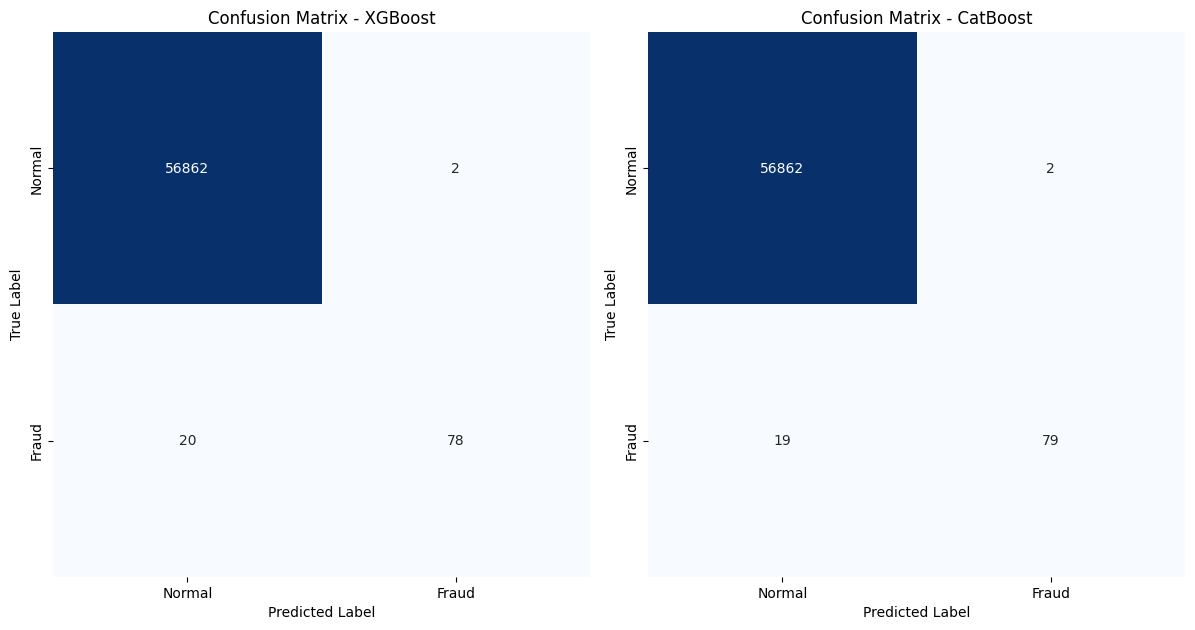

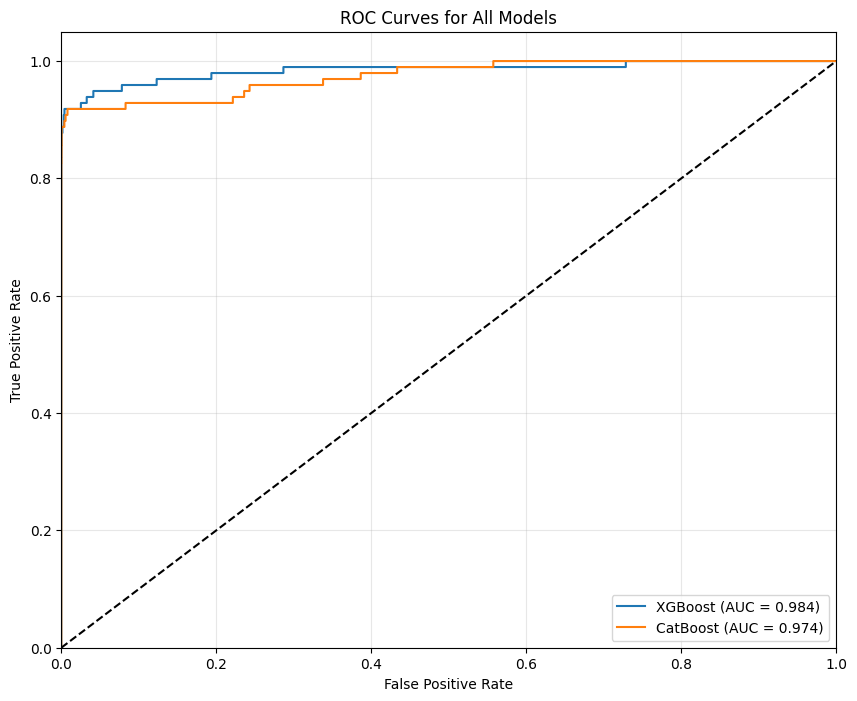

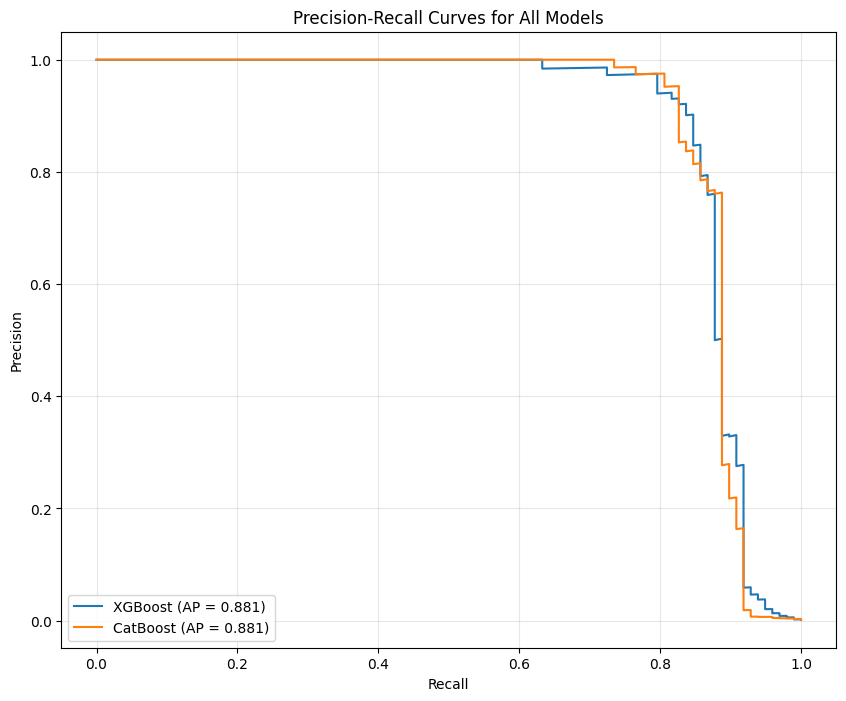

In [31]:
# Ensure datasets are numpy arrays
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

# Define classification models to evaluate (removed Gradient Boosting, added CatBoost and AdaBoost)
models = {
    #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
}

# 2. Function to plot confusion matrix
def plot_confusion_matrix(cm, title, normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', 
                cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.tight_layout()

# Dictionaries to store results
results = defaultdict(dict)
y_probs = {}
training_times = {}
testing_times = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Training with timing
    start_time = time.time()
    model.fit(X_train_array, y_train_array)
    training_times[name] = time.time() - start_time
    
    # Prediction with timing
    start_time = time.time()
    y_pred = model.predict(X_test_array)
    y_prob = model.predict_proba(X_test_array)[:, 1]
    testing_times[name] = time.time() - start_time
    
    # Store results
    y_probs[name] = y_prob
    
    # Classification metrics
    accuracy = accuracy_score(y_test_array, y_pred)
    precision = precision_score(y_test_array, y_pred)
    recall = recall_score(y_test_array, y_pred)
    f1 = f1_score(y_test_array, y_pred)
    
    # ROC and PR curves
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    avg_precision = average_precision_score(y_test_array, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)
    
    # Store all metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Avg Precision': avg_precision,
        'Confusion Matrix': cm,
        'Training Time': training_times[name],
        'Testing Time': testing_times[name]
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"{name} - ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Avg Precision: {avg_precision:.4f}")
    print(f"{name} - Training time: {training_times[name]:.2f}s, Testing time: {testing_times[name]:.2f}s")

# Plot confusion matrices for all models
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 7. Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, y_prob in y_probs.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    avg_precision = results[name]['Avg Precision']
    plt.plot(recall_curve, precision_curve, label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()

Training on 227451 normal transactions only

Training Isolation Forest (contamination=0.10)...
Isolation Forest (contamination=0.10) Results:
  ROC AUC: 0.9579, PR AUC: 0.0989, Avg Precision: 0.1049
  Default threshold:
    Accuracy: 0.8998, Precision: 0.0154
    Recall: 0.9082, F1 Score: 0.0302
  Optimal threshold (0.7273):
    Accuracy: 0.9967, Precision: 0.1761
    Recall: 0.2551, F1 Score: 0.2083
  Training time: 6.06s, Testing time: 3.65s

Training Isolation Forest (contamination=0.20)...
Isolation Forest (contamination=0.20) Results:
  ROC AUC: 0.9579, PR AUC: 0.0989, Avg Precision: 0.1049
  Default threshold:
    Accuracy: 0.7998, Precision: 0.0081
    Recall: 0.9490, F1 Score: 0.0161
  Optimal threshold (0.7273):
    Accuracy: 0.9967, Precision: 0.1761
    Recall: 0.2551, F1 Score: 0.2083
  Training time: 5.94s, Testing time: 3.67s

Training Isolation Forest (contamination=0.30)...
Isolation Forest (contamination=0.30) Results:
  ROC AUC: 0.9579, PR AUC: 0.0989, Avg Precision: 

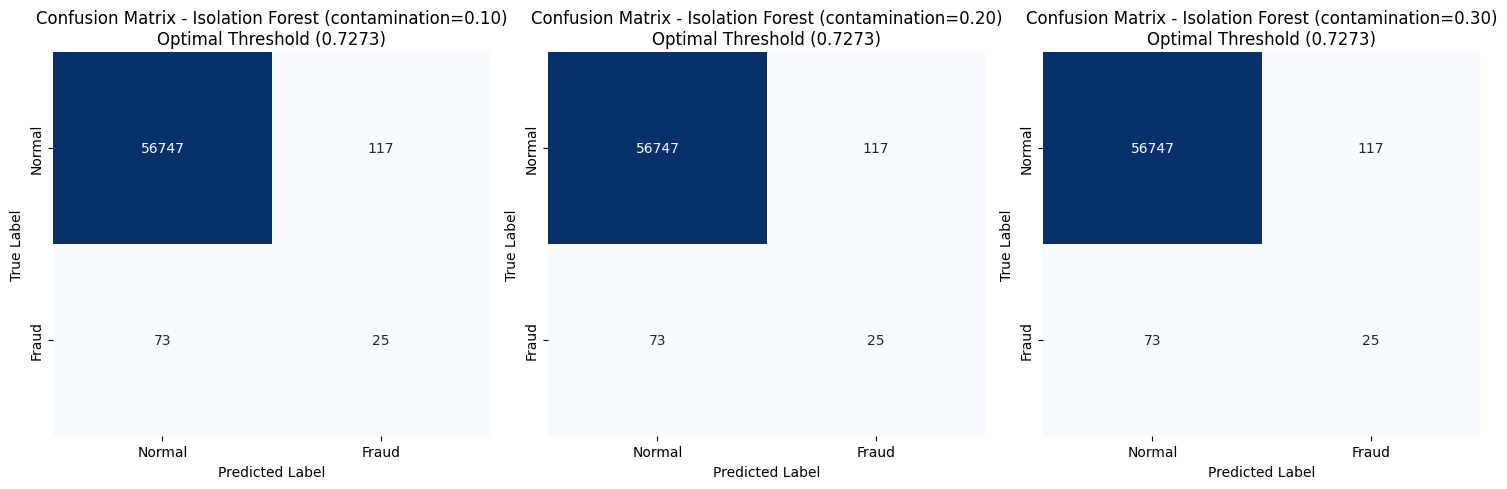

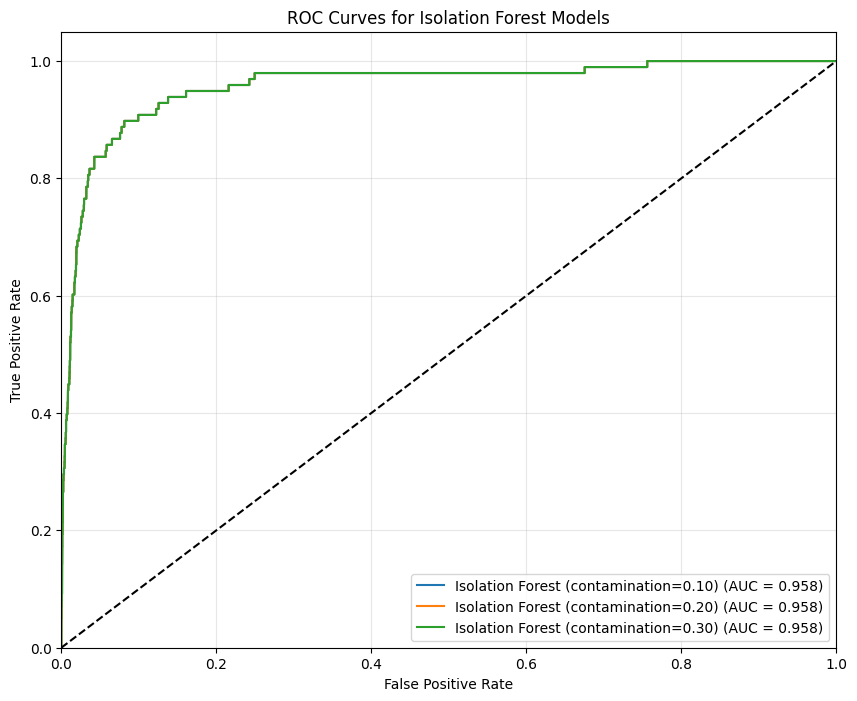

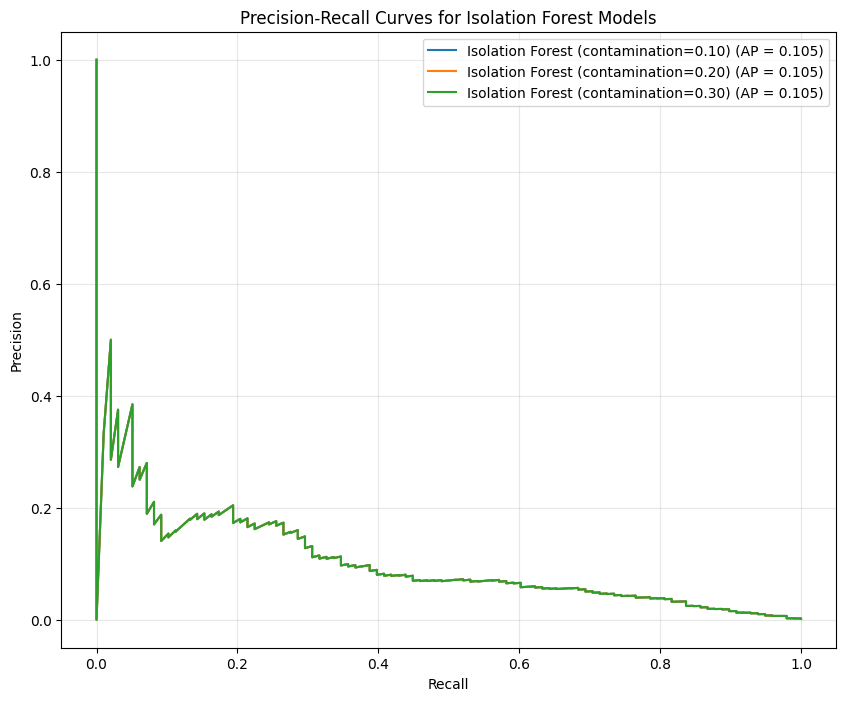

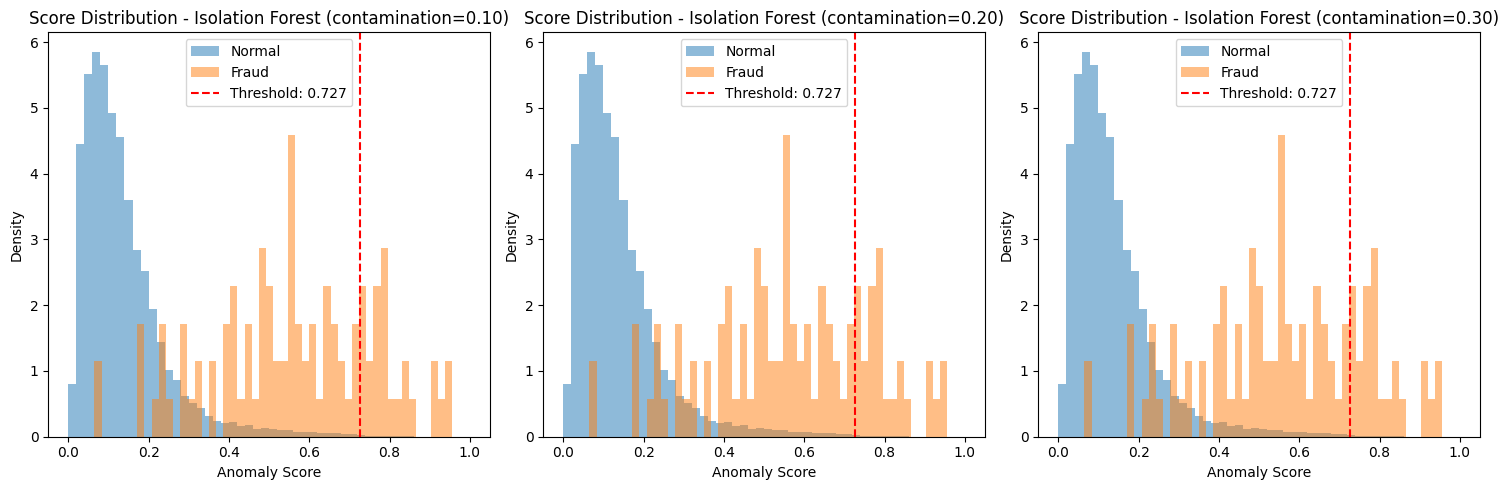


Model Performance Summary:
                                       F1 Score  Precision  Recall  ROC AUC  \
Model                                                                         
Isolation Forest (contamination=0.10)    0.2083     0.1761  0.2551   0.9579   
Isolation Forest (contamination=0.20)    0.2083     0.1761  0.2551   0.9579   
Isolation Forest (contamination=0.30)    0.2083     0.1761  0.2551   0.9579   

                                       PR AUC  Training Time (s)  \
Model                                                              
Isolation Forest (contamination=0.10)  0.0989             6.0640   
Isolation Forest (contamination=0.20)  0.0989             5.9383   
Isolation Forest (contamination=0.30)  0.0989             5.9719   

                                       Testing Time (s)  
Model                                                    
Isolation Forest (contamination=0.10)            3.6481  
Isolation Forest (contamination=0.20)            3.6671  
Iso

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

# Ensure datasets are numpy arrays
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', 
                cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.tight_layout()

# Function to find optimal threshold based on F1 score
def find_optimal_threshold(y_true, scores):
    thresholds = np.linspace(min(scores), max(scores), 100)
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (scores >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
    
    optimal_idx = np.argmax(f1_scores)
    return thresholds[optimal_idx]

# Define Isolation Forest models with different contamination parameters
anomaly_models = {
    'Isolation Forest (contamination=0.10)': IsolationForest(n_estimators=100, contamination=0.10, random_state=42),
    'Isolation Forest (contamination=0.20)': IsolationForest(n_estimators=100, contamination=0.20, random_state=42),
    'Isolation Forest (contamination=0.30)': IsolationForest(n_estimators=100, contamination=0.30, random_state=42)
}

# Dictionaries to store results
results = defaultdict(dict)
anomaly_scores = {}
training_times = {}
testing_times = {}

# Get indices of normal transactions (y=0) for training
normal_idx = y_train_array == 0
X_train_normal = X_train_array[normal_idx]
print(f"Training on {len(X_train_normal)} normal transactions only")

# Train and evaluate models
for name, model in anomaly_models.items():
    print(f"\nTraining {name}...")
    
    # Training with timing
    start_time = time.time()
    model.fit(X_train_normal)
    training_times[name] = time.time() - start_time
    
    # Prediction with timing
    start_time = time.time()
    
    # For anomaly models, -1 means anomaly, 1 means normal
    # Convert to 1 for fraud (anomaly) and 0 for normal
    raw_pred = model.predict(X_test_array)
    y_pred = (raw_pred == -1).astype(int)
    
    # Get anomaly scores (higher = more anomalous)
    scores = -model.decision_function(X_test_array)
    
    # Normalize scores to [0, 1] range
    normalized_scores = (scores - scores.min()) / (scores.max() - scores.min())
    
    testing_times[name] = time.time() - start_time
    
    # Store results
    anomaly_scores[name] = normalized_scores
    
    # Find optimal threshold based on F1 score
    optimal_threshold = find_optimal_threshold(y_test_array, normalized_scores)
    y_pred_optimal = (normalized_scores >= optimal_threshold).astype(int)
    
    # Calculate metrics
    metrics_default = {
        'Accuracy': accuracy_score(y_test_array, y_pred),
        'Precision': precision_score(y_test_array, y_pred),
        'Recall': recall_score(y_test_array, y_pred),
        'F1 Score': f1_score(y_test_array, y_pred),
        'Confusion Matrix': confusion_matrix(y_test_array, y_pred)
    }
    
    metrics_optimal = {
        'Threshold': optimal_threshold,
        'Accuracy': accuracy_score(y_test_array, y_pred_optimal),
        'Precision': precision_score(y_test_array, y_pred_optimal),
        'Recall': recall_score(y_test_array, y_pred_optimal),
        'F1 Score': f1_score(y_test_array, y_pred_optimal),
        'Confusion Matrix': confusion_matrix(y_test_array, y_pred_optimal)
    }
    
    # ROC and PR curves
    fpr, tpr, _ = roc_curve(y_test_array, normalized_scores)
    roc_auc = auc(fpr, tpr)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, normalized_scores)
    pr_auc = auc(recall_curve, precision_curve)
    avg_precision = average_precision_score(y_test_array, normalized_scores)
    
    # Store all metrics
    results[name] = {
        'Default': metrics_default,
        'Optimal': metrics_optimal,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Avg Precision': avg_precision,
        'Training Time': training_times[name],
        'Testing Time': testing_times[name]
    }
    
    # Print results
    print(f"{name} Results:")
    print(f"  ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Avg Precision: {avg_precision:.4f}")
    
    print(f"  Default threshold:")
    print(f"    Accuracy: {metrics_default['Accuracy']:.4f}, Precision: {metrics_default['Precision']:.4f}")
    print(f"    Recall: {metrics_default['Recall']:.4f}, F1 Score: {metrics_default['F1 Score']:.4f}")
    
    print(f"  Optimal threshold ({optimal_threshold:.4f}):")
    print(f"    Accuracy: {metrics_optimal['Accuracy']:.4f}, Precision: {metrics_optimal['Precision']:.4f}")
    print(f"    Recall: {metrics_optimal['Recall']:.4f}, F1 Score: {metrics_optimal['F1 Score']:.4f}")
    
    print(f"  Training time: {training_times[name]:.2f}s, Testing time: {testing_times[name]:.2f}s")

# 1. Plot confusion matrices for all models with optimal threshold
plt.figure(figsize=(15, 5))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(1, len(results), i+1)
    cm = metrics['Optimal']['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}\nOptimal Threshold ({metrics["Optimal"]["Threshold"]:.4f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

# 2. Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, scores in anomaly_scores.items():
    fpr, tpr, _ = roc_curve(y_test_array, scores)
    roc_auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Isolation Forest Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 3. Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, scores in anomaly_scores.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, scores)
    avg_precision = results[name]['Avg Precision']
    plt.plot(recall_curve, precision_curve, label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Isolation Forest Models')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()

# 4. Plot Score Distributions for Normal vs Fraud 
plt.figure(figsize=(15, 5))
for i, (name, scores) in enumerate(anomaly_scores.items()):
    plt.subplot(1, len(anomaly_scores), i+1)
    
    # Create separate distributions for normal and fraud
    normal_scores = scores[y_test_array == 0]
    fraud_scores = scores[y_test_array == 1]
    
    # Plot histograms
    plt.hist(normal_scores, bins=50, alpha=0.5, label='Normal', density=True)
    plt.hist(fraud_scores, bins=50, alpha=0.5, label='Fraud', density=True)
    
    # Mark optimal threshold
    optimal_threshold = results[name]['Optimal']['Threshold']
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', 
                label=f'Threshold: {optimal_threshold:.3f}')
    
    plt.title(f'Score Distribution - {name}')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout()
plt.show()

# 5. Create a summary table
summary_data = []
for name, metrics in results.items():
    summary_data.append({
        'Model': name,
        'F1 Score': metrics['Optimal']['F1 Score'],
        'Precision': metrics['Optimal']['Precision'],
        'Recall': metrics['Optimal']['Recall'],
        'ROC AUC': metrics['ROC AUC'],
        'PR AUC': metrics['PR AUC'],
        'Training Time (s)': metrics['Training Time'],
        'Testing Time (s)': metrics['Testing Time']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('F1 Score', ascending=False)
summary_df = summary_df.set_index('Model')
summary_df = summary_df.round(4)

print("\nModel Performance Summary:")
print(summary_df)

### Ensemble

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone, BaseEstimator, ClassifierMixin
import shap
import warnings
warnings.filterwarnings("ignore")

# Helper function to convert feature names to indices
def get_feature_indices(feature_names, all_features):
    """Convert feature names to indices for NumPy arrays"""
    if feature_names is None:
        return None
    
    # If all_features is a list or array of column names
    if isinstance(all_features, (list, np.ndarray)) and len(all_features) > 0 and isinstance(all_features[0], str):
        return [all_features.index(feature) for feature in feature_names]
    
    # If working with pandas DataFrame, return column names
    if isinstance(all_features, pd.DataFrame):
        return feature_names
    
    # Default: assume feature_names are already indices
    return feature_names

# Function to select features from array
def select_features(X, feature_indices):
    """Select features from array using indices"""
    if feature_indices is None:
        return X
    
    # If X is a DataFrame and feature_indices are strings
    if isinstance(X, pd.DataFrame) and isinstance(feature_indices[0], str):
        return X[feature_indices]
    
    # If X is a NumPy array and feature_indices are integers
    if isinstance(X, np.ndarray):
        return X[:, feature_indices]
    
    # Default case
    return X

# Function to evaluate a model with detailed metrics and visualizations
def evaluate_ensemble_model(y_true, y_pred_proba, model_name, threshold=0.5, plot=True):
    """
    Comprehensive evaluation of model performance with metrics and visualizations
    
    Parameters:
    -----------
    y_true: True labels
    y_pred_proba: Predicted probabilities
    model_name: Name of the model/ensemble method
    threshold: Classification threshold (default: 0.5)
    plot: Whether to plot confusion matrix
    
    Returns:
    --------
    Dictionary with performance metrics
    """
    # Find optimal threshold based on F1 score
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_true, y_pred_proba)
    f1_scores = 2 * precision_curve * recall_curve / (precision_curve + recall_curve + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if len(thresholds) > optimal_idx else 0.5
    
    # Binary predictions at default and optimal thresholds
    y_pred_default = (y_pred_proba >= threshold).astype(int)
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate metrics
    metrics = {}
    
    # Default threshold metrics
    metrics['default'] = {
        'accuracy': accuracy_score(y_true, y_pred_default),
        'precision': precision_score(y_true, y_pred_default),
        'recall': recall_score(y_true, y_pred_default),
        'f1': f1_score(y_true, y_pred_default),
        'confusion_matrix': confusion_matrix(y_true, y_pred_default)
    }
    
    # Optimal threshold metrics
    metrics['optimal'] = {
        'threshold': optimal_threshold,
        'accuracy': accuracy_score(y_true, y_pred_optimal),
        'precision': precision_score(y_true, y_pred_optimal),
        'recall': recall_score(y_true, y_pred_optimal),
        'f1': f1_score(y_true, y_pred_optimal),
        'confusion_matrix': confusion_matrix(y_true, y_pred_optimal)
    }
    
    # Threshold-independent metrics
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    metrics['roc_auc'] = auc(fpr, tpr)
    metrics['avg_precision'] = average_precision_score(y_true, y_pred_proba)
    
    # Print results
    print(f"\n=== {model_name} Performance ===")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")
    print(f"Average Precision: {metrics['avg_precision']:.4f}")
    
    print(f"\nDefault Threshold ({threshold:.4f}):")
    print(f"  Accuracy: {metrics['default']['accuracy']:.4f}")
    print(f"  Precision: {metrics['default']['precision']:.4f}")
    print(f"  Recall: {metrics['default']['recall']:.4f}")
    print(f"  F1 Score: {metrics['default']['f1']:.4f}")
    
    print(f"\nOptimal Threshold ({optimal_threshold:.4f}):")
    print(f"  Accuracy: {metrics['optimal']['accuracy']:.4f}")
    print(f"  Precision: {metrics['optimal']['precision']:.4f}")
    print(f"  Recall: {metrics['optimal']['recall']:.4f}")
    print(f"  F1 Score: {metrics['optimal']['f1']:.4f}")
    
    # Plot confusion matrices if requested
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Default threshold confusion matrix
        ConfusionMatrixDisplay(
            confusion_matrix=metrics['default']['confusion_matrix'],
            display_labels=['Normal', 'Fraud']
        ).plot(ax=axes[0], cmap='Blues', values_format='d')
        axes[0].set_title(f"{model_name} - Default Threshold ({threshold:.4f})")
        
        # Optimal threshold confusion matrix
        ConfusionMatrixDisplay(
            confusion_matrix=metrics['optimal']['confusion_matrix'],
            display_labels=['Normal', 'Fraud']
        ).plot(ax=axes[1], cmap='Blues', values_format='d')
        axes[1].set_title(f"{model_name} - Optimal Threshold ({optimal_threshold:.4f})")
        
        plt.tight_layout()
        plt.show()
        
        # Print classification report for optimal threshold
        print(f"\nClassification Report (Optimal Threshold):")
        print(classification_report(y_true, y_pred_optimal))
    
    return metrics

# 1. Simple Average Ensemble
def simple_average_ensemble(trained_models, X_test, feature_subsets, all_feature_names=None):
    """
    Create a simple average ensemble from multiple models
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_test: Test features
    feature_subsets: Dictionary mapping model names to feature subsets (names or indices)
    all_feature_names: List of all feature names (optional)
    
    Returns:
    --------
    Average predicted probabilities
    """
    print("\nGenerating Simple Average Ensemble predictions...")
    
    # Get predictions from each model
    model_predictions = []
    for model_name, model in trained_models.items():
        features = feature_subsets.get(model_name, None)
        
        # Convert feature names to indices if needed
        feature_indices = get_feature_indices(features, all_feature_names) if features else None
        
        # Select features from X_test
        X_test_model = select_features(X_test, feature_indices)
        
        # Get predictions
        preds = model.predict_proba(X_test_model)[:, 1]
        model_predictions.append(preds)
        
    # Average the predictions
    avg_predictions = np.mean(model_predictions, axis=0)
    return avg_predictions

# 2. Standard Stacking Implementation
def train_stacking_ensemble(trained_models, X_train, y_train, X_test, feature_subsets, all_feature_names=None, cv=5):
    """
    Implement stacking with cross-validation
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train: Training features
    y_train: Training labels
    X_test: Test features
    feature_subsets: Dictionary mapping model names to feature subsets
    all_feature_names: List of all feature names (optional)
    cv: Number of cross-validation folds
    
    Returns:
    --------
    Dictionary with meta-model and predictions
    """
    print("\nTraining Stacking Ensemble...")
    
    # Initialize cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Generate out-of-fold predictions for training meta-model
    meta_features_train = np.zeros((X_train.shape[0], len(trained_models)))
    meta_features_test = np.zeros((X_test.shape[0], len(trained_models)))
    
    # For each base model
    for i, (model_name, model) in enumerate(trained_models.items()):
        print(f"  Generating {model_name} meta-features...")
        features = feature_subsets.get(model_name, None)
        
        # Convert feature names to indices if needed
        feature_indices = get_feature_indices(features, all_feature_names) if features else None
        
        # Get out-of-fold predictions for training data
        oof_preds = np.zeros(X_train.shape[0])
        
        for train_idx, val_idx in cv_strategy.split(X_train, y_train):
            # Split data for this fold
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_train_fold = y_train[train_idx]
            
            # Apply feature selection if needed
            X_train_fold_model = select_features(X_train_fold, feature_indices)
            X_val_fold_model = select_features(X_val_fold, feature_indices)
            
            # Clone and train the model
            model_clone = clone(model)
            model_clone.fit(X_train_fold_model, y_train_fold)
            
            # Generate predictions for this fold
            oof_preds[val_idx] = model_clone.predict_proba(X_val_fold_model)[:, 1]
        
        # Store out-of-fold predictions as meta-features
        meta_features_train[:, i] = oof_preds
        
        # Generate test meta-features using the original pre-trained model
        X_test_model = select_features(X_test, feature_indices)
        meta_features_test[:, i] = model.predict_proba(X_test_model)[:, 1]
    
    # Train a meta-model on the out-of-fold predictions
    meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    meta_model.fit(meta_features_train, y_train)
    
    # Get coefficients to see model importance
    coefficients = meta_model.coef_[0]
    model_importance = {name: coef for name, coef in zip(trained_models.keys(), coefficients)}
    print("\nMeta-model coefficients:")
    for name, coef in model_importance.items():
        print(f"  {name}: {coef:.4f}")
    
    # Generate final predictions
    meta_predictions = meta_model.predict_proba(meta_features_test)[:, 1]
    
    return {
        'meta_model': meta_model,
        'meta_features_train': meta_features_train,
        'meta_features_test': meta_features_test,
        'predictions': meta_predictions,
        'model_importance': model_importance
    }

# 3. SHAP-Weighted Ensemble
def shap_weighted_ensemble(trained_models, X_train, X_test, feature_subsets, all_feature_names=None, sample_size=1000):
    """
    Create ensemble using SHAP-based model weights
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train: Training features
    X_test: Test features
    feature_subsets: Dictionary mapping model names to feature subsets
    all_feature_names: List of all feature names (optional)
    sample_size: Number of samples to use for SHAP calculation
    
    Returns:
    --------
    Dictionary with weighted predictions and model weights
    """
    print("\nGenerating SHAP-Weighted Ensemble...")
    
    # Get predictions from each model
    model_predictions = {}
    model_weights = {}
    
    # Sample data for SHAP calculation if dataset is large
    if X_train.shape[0] > sample_size:
        np.random.seed(42)
        idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_shap = X_train[idx]
    else:
        X_shap = X_train
    
    # Calculate SHAP values and model weights
    for model_name, model in trained_models.items():
        print(f"  Calculating SHAP values for {model_name}...")
        features = feature_subsets.get(model_name, None)
        
        # Convert feature names to indices if needed
        feature_indices = get_feature_indices(features, all_feature_names) if features else None
        
        # Get predictions for test data
        X_test_model = select_features(X_test, feature_indices)
        model_predictions[model_name] = model.predict_proba(X_test_model)[:, 1]
        
        # Calculate SHAP values
        X_shap_model = select_features(X_shap, feature_indices)
        
        try:
            # Use TreeExplainer for tree-based models
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_shap_model)
            
            # For classification, shap_values might be a list with one array per class
            if isinstance(shap_values, list):
                # Get class 1 (fraud) SHAP values for binary classification
                shap_values = shap_values[1]
            
            # Use mean absolute SHAP value as model weight
            model_weights[model_name] = np.abs(shap_values).mean()
            
        except Exception as e:
            print(f"    Error calculating SHAP values: {e}")
            # Fallback: use default equal weight
            model_weights[model_name] = 1.0
    
    # Normalize weights
    total_weight = sum(model_weights.values())
    normalized_weights = {name: weight/total_weight for name, weight in model_weights.items()}
    
    print("\nSHAP-based model weights:")
    for name, weight in normalized_weights.items():
        print(f"  {name}: {weight:.4f}")
    
    # Create weighted predictions
    weighted_predictions = np.zeros(X_test.shape[0])
    for model_name, predictions in model_predictions.items():
        weighted_predictions += normalized_weights[model_name] * predictions
    
    return {
        'predictions': weighted_predictions,
        'model_weights': normalized_weights,
        'model_predictions': model_predictions
    }

# 4. SHAP-Guided Feature-Specific Stacking
def shap_guided_stacking(trained_models, X_train, y_train, X_test, feature_subsets, all_feature_names=None, cv=5):
    """
    Implement stacking that incorporates SHAP-identified feature patterns
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train: Training features
    y_train: Training labels
    X_test: Test features
    feature_subsets: Dictionary mapping model names to feature subsets
    all_feature_names: List of all feature names (optional)
    cv: Number of cross-validation folds
    
    Returns:
    --------
    Dictionary with meta-model and predictions
    """
    print("\nTraining SHAP-Guided Feature-Specific Stacking...")
    
    # Initialize column indices for feature subsets
    feature_indices = {}
    for model_name, features in feature_subsets.items():
        feature_indices[model_name] = get_feature_indices(features, all_feature_names)
    
    # Initialize cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Base meta-features (same as standard stacking)
    base_meta_features_train = np.zeros((X_train.shape[0], len(trained_models)))
    base_meta_features_test = np.zeros((X_test.shape[0], len(trained_models)))
    
    # For each base model
    model_explainers = {}
    model_oof_preds = {}
    
    for i, (model_name, model) in enumerate(trained_models.items()):
        print(f"  Generating {model_name} meta-features...")
        feature_idx = feature_indices.get(model_name, None)
        
        # Get out-of-fold predictions for training data
        oof_preds = np.zeros(X_train.shape[0])
        
        for train_idx, val_idx in cv_strategy.split(X_train, y_train):
            # Split data for this fold
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_train_fold = y_train[train_idx]
            
            # Apply feature selection if needed
            X_train_fold_model = select_features(X_train_fold, feature_idx)
            X_val_fold_model = select_features(X_val_fold, feature_idx)
            
            # Clone and train the model
            model_clone = clone(model)
            model_clone.fit(X_train_fold_model, y_train_fold)
            
            # Generate predictions for this fold
            oof_preds[val_idx] = model_clone.predict_proba(X_val_fold_model)[:, 1]
        
        # Store out-of-fold predictions as meta-features
        base_meta_features_train[:, i] = oof_preds
        model_oof_preds[model_name] = oof_preds
        
        # Generate test meta-features using the original pre-trained model
        X_test_model = select_features(X_test, feature_idx)
        base_meta_features_test[:, i] = model.predict_proba(X_test_model)[:, 1]
        
        # Try to create a SHAP explainer for this model
        try:
            # Sample data if needed
            sample_size = min(1000, X_train.shape[0])
            np.random.seed(42)
            sample_idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
            X_sample = X_train[sample_idx]
            X_sample_model = select_features(X_sample, feature_idx)
            
            # Create explainer
            explainer = shap.TreeExplainer(model)
            model_explainers[model_name] = (explainer, feature_idx)
            print(f"    Created SHAP explainer for {model_name}")
        except Exception as e:
            print(f"    Could not create SHAP explainer for {model_name}: {e}")
    
    # Now add SHAP-guided meta-features based on key patterns
    
    # 1. Identify important features for each model using SHAP
    important_features = {}
    for model_name, (explainer, feature_idx) in model_explainers.items():
        if feature_idx is None:
            continue
            
        # Sample data to get feature importance
        sample_size = min(1000, X_train.shape[0])
        np.random.seed(42)
        sample_idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_sample = select_features(X_train[sample_idx], feature_idx)
        
        # Get SHAP values
        shap_values = explainer.shap_values(X_sample)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Class 1 for binary classification
            
        # Calculate feature importance
        feature_importance = np.abs(shap_values).mean(axis=0)
        
        # Get top features
        top_indices = np.argsort(-feature_importance)[:3]  # Top 3 features
        
        # If we have feature names, use them; otherwise use indices
        if all_feature_names is not None:
            subset_indices = [feature_idx[i] for i in top_indices]
            important_features[model_name] = [all_feature_names[i] for i in subset_indices]
        else:
            important_features[model_name] = [feature_idx[i] for i in top_indices]
        
        print(f"  Top features for {model_name}: {important_features[model_name]}")
    
    # 2. Create additional meta-features based on SHAP insights
    additional_meta_features_train = []
    additional_meta_features_test = []
    
    # For XGBoost, create specialized meta-features for its top features
    if 'XGBoost' in important_features and 'XGBoost' in model_oof_preds:
        xgb_top_features = important_features['XGBoost']
        if len(xgb_top_features) >= 2:
            # Get feature indices
            feature1 = xgb_top_features[0]
            feature1_idx = feature1 if isinstance(feature1, int) else list(all_feature_names).index(feature1)
            
            # Check if feature has extreme values (potentially fraudulent)
            extreme_low_mask_train = X_train[:, feature1_idx] < np.percentile(X_train[:, feature1_idx], 10)
            extreme_high_mask_train = X_train[:, feature1_idx] > np.percentile(X_train[:, feature1_idx], 90)
            extreme_mask_train = extreme_low_mask_train | extreme_high_mask_train
            
            extreme_low_mask_test = X_test[:, feature1_idx] < np.percentile(X_train[:, feature1_idx], 10)
            extreme_high_mask_test = X_test[:, feature1_idx] > np.percentile(X_train[:, feature1_idx], 90)
            extreme_mask_test = extreme_low_mask_test | extreme_high_mask_test
            
            # Create meta-feature: XGBoost prediction when feature1 has extreme values
            xgb_feature1_meta_train = np.where(extreme_mask_train, 
                                             model_oof_preds['XGBoost'], 
                                             model_oof_preds['Random Forest'])
            additional_meta_features_train.append(xgb_feature1_meta_train)
            
            xgb_feature1_meta_test = np.where(extreme_mask_test, 
                                            base_meta_features_test[:, 1],  # XGBoost
                                            base_meta_features_test[:, 0])  # Random Forest
            additional_meta_features_test.append(xgb_feature1_meta_test)
            
            print(f"  Added meta-feature: XGBoost for extreme {feature1} values")
            
            # For second feature
            feature2 = xgb_top_features[1]
            feature2_idx = feature2 if isinstance(feature2, int) else list(all_feature_names).index(feature2)
            
            high_mask_train = X_train[:, feature2_idx] > np.percentile(X_train[:, feature2_idx], 70)
            high_mask_test = X_test[:, feature2_idx] > np.percentile(X_train[:, feature2_idx], 70)
            
            xgb_feature2_meta_train = np.where(high_mask_train, 
                                             model_oof_preds['XGBoost'], 
                                             model_oof_preds['Random Forest'])
            additional_meta_features_train.append(xgb_feature2_meta_train)
            
            xgb_feature2_meta_test = np.where(high_mask_test, 
                                            base_meta_features_test[:, 1],  # XGBoost
                                            base_meta_features_test[:, 0])  # Random Forest
            additional_meta_features_test.append(xgb_feature2_meta_test)
            
            print(f"  Added meta-feature: XGBoost for high {feature2} values")
    
    # For CatBoost, create specialized meta-features
    if 'CatBoost' in important_features and 'CatBoost' in model_oof_preds:
        cb_top_features = important_features['CatBoost']
        if len(cb_top_features) >= 1:
            feature = cb_top_features[0]
            feature_idx = feature if isinstance(feature, int) else list(all_feature_names).index(feature)
            
            # For features where CatBoost excels
            extreme_mask_train = np.abs(X_train[:, feature_idx]) > np.percentile(np.abs(X_train[:, feature_idx]), 50)
            extreme_mask_test = np.abs(X_test[:, feature_idx]) > np.percentile(np.abs(X_train[:, feature_idx]), 50)
            
            cb_feature_meta_train = np.where(extreme_mask_train, 
                                           model_oof_preds['CatBoost'], 
                                           model_oof_preds['Random Forest'])
            additional_meta_features_train.append(cb_feature_meta_train)
            
            cb_feature_meta_test = np.where(extreme_mask_test, 
                                          base_meta_features_test[:, 2],  # CatBoost
                                          base_meta_features_test[:, 0])  # Random Forest
            additional_meta_features_test.append(cb_feature_meta_test)
            
            print(f"  Added meta-feature: CatBoost for extreme {feature} values")
    
    # Combine base and additional meta-features
    if additional_meta_features_train:
        all_meta_features_train = np.column_stack([
            base_meta_features_train, 
            np.column_stack(additional_meta_features_train)
        ])
        all_meta_features_test = np.column_stack([
            base_meta_features_test, 
            np.column_stack(additional_meta_features_test)
        ])
        
        feature_names = list(trained_models.keys()) + [
            "XGB_extremeV14", "XGB_highV4", "CB_extremeFeature"
        ][:len(additional_meta_features_train)]
    else:
        all_meta_features_train = base_meta_features_train
        all_meta_features_test = base_meta_features_test
        feature_names = list(trained_models.keys())
    
    # Train meta-model on the enhanced meta-features
    meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    meta_model.fit(all_meta_features_train, y_train)
    
    # Get coefficients to see meta-feature importance
    coefficients = meta_model.coef_[0]
    meta_feature_importance = {name: coef for name, coef in zip(feature_names, coefficients)}
    print("\nMeta-feature importance:")
    for name, coef in meta_feature_importance.items():
        print(f"  {name}: {coef:.4f}")
    
    # Generate final predictions
    meta_predictions = meta_model.predict_proba(all_meta_features_test)[:, 1]
    
    return {
        'meta_model': meta_model,
        'meta_features_train': all_meta_features_train,
        'meta_features_test': all_meta_features_test,
        'predictions': meta_predictions,
        'meta_feature_importance': meta_feature_importance,
        'feature_names': feature_names
    }

# Main function to run all ensemble methods
def run_ensemble_comparison(trained_models, X_train, y_train, X_test, y_test):
    """
    Compare all ensemble methods
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train, y_train: Training data
    X_test, y_test: Test data
    
    Returns:
    --------
    Dictionary with all results
    """
    # Define feature indices for each model based on SHAP insights
    # Because we're working with NumPy arrays, we need to use column indices
    
    # Create list of feature names or indices
    if hasattr(X_train, 'columns'):  # If X_train is a DataFrame
        all_feature_names = list(X_train.columns)
    else:  # If X_train is a NumPy array
        all_feature_names = [f"V{i}" for i in range(X_train.shape[1])]
    
    # Instead of string names, use indices for NumPy array indexing
    feature_subsets = {
        'Random Forest': [all_feature_names.index(f) if f in all_feature_names else int(f.replace('V', '')) 
                          for f in ['V14', 'V17', 'V12', 'V4', 'V10', 'V1']],
        'XGBoost': [all_feature_names.index(f) if f in all_feature_names else int(f.replace('V', '')) 
                    for f in ['V14', 'V4', 'V12', 'V8', 'Amount']],
        'CatBoost': [all_feature_names.index(f) if f in all_feature_names else int(f.replace('V', '')) 
                     for f in ['V14', 'V4', 'V12', 'V1', 'V8', 'V26', 'V27']]
    }
    
    print(f"Using feature indices:")
    for model, indices in feature_subsets.items():
        print(f"  {model}: {indices}")
    
    # 1. Simple Average Ensemble
    avg_predictions = simple_average_ensemble(trained_models, X_test, feature_subsets, all_feature_names)
    avg_metrics = evaluate_ensemble_model(y_test, avg_predictions, "Simple Average Ensemble")
    
    # 2. Standard Stacking
    stacking_results = train_stacking_ensemble(
        trained_models, X_train, y_train, X_test, feature_subsets, all_feature_names
    )
    stacking_metrics = evaluate_ensemble_model(
        y_test, stacking_results['predictions'], "Standard Stacking Ensemble"
    )
    
    # 3. SHAP-Weighted Ensemble
    shap_weighted_results = shap_weighted_ensemble(
        trained_models, X_train, X_test, feature_subsets, all_feature_names
    )
    shap_weighted_metrics = evaluate_ensemble_model(
        y_test, shap_weighted_results['predictions'], "SHAP-Weighted Ensemble"
    )
    
    # 4. SHAP-Guided Feature-Specific Stacking
    shap_guided_results = shap_guided_stacking(
        trained_models, X_train, y_train, X_test, feature_subsets, all_feature_names
    )
    shap_guided_metrics = evaluate_ensemble_model(
        y_test, shap_guided_results['predictions'], "SHAP-Guided Stacking Ensemble"
    )
    
    # Collect all results
    all_results = {
        'Simple Average': {
            'predictions': avg_predictions,
            'metrics': avg_metrics
        },
        'Standard Stacking': {
            'predictions': stacking_results['predictions'],
            'metrics': stacking_metrics,
            'meta_model': stacking_results['meta_model'],
            'model_importance': stacking_results['model_importance']
        },
        'SHAP-Weighted': {
            'predictions': shap_weighted_results['predictions'],
            'metrics': shap_weighted_metrics,
            'model_weights': shap_weighted_results['model_weights']
        },
        'SHAP-Guided': {
            'predictions': shap_guided_results['predictions'],
            'metrics': shap_guided_metrics,
            'meta_model': shap_guided_results['meta_model'],
            'meta_feature_importance': shap_guided_results['meta_feature_importance']
        }
    }
    
    # Compare all methods
    plot_comparative_performance(all_results, y_test)
    
    # Determine best method based on F1 score
    f1_scores = {
        method: results['metrics']['optimal']['f1'] 
        for method, results in all_results.items()
    }
    best_method = max(f1_scores.items(), key=lambda x: x[1])[0]
    print(f"\nBest ensemble method: {best_method} (F1 = {f1_scores[best_method]:.4f})")
    
    return all_results

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone, BaseEstimator, ClassifierMixin
import shap
import warnings
warnings.filterwarnings("ignore")

# Function to evaluate a model with detailed metrics and visualizations
def evaluate_ensemble_model(y_true, y_pred_proba, model_name, threshold=0.5, plot=True):
    """
    Comprehensive evaluation of model performance with metrics and visualizations
    
    Parameters:
    -----------
    y_true: True labels
    y_pred_proba: Predicted probabilities
    model_name: Name of the model/ensemble method
    threshold: Classification threshold (default: 0.5)
    plot: Whether to plot confusion matrix
    
    Returns:
    --------
    Dictionary with performance metrics
    """
    # Find optimal threshold based on F1 score
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_true, y_pred_proba)
    f1_scores = 2 * precision_curve * recall_curve / (precision_curve + recall_curve + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if len(thresholds) > optimal_idx else 0.5
    
    # Binary predictions at default and optimal thresholds
    y_pred_default = (y_pred_proba >= threshold).astype(int)
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate metrics
    metrics = {}
    
    # Default threshold metrics
    metrics['default'] = {
        'accuracy': accuracy_score(y_true, y_pred_default),
        'precision': precision_score(y_true, y_pred_default),
        'recall': recall_score(y_true, y_pred_default),
        'f1': f1_score(y_true, y_pred_default),
        'confusion_matrix': confusion_matrix(y_true, y_pred_default)
    }
    
    # Optimal threshold metrics
    metrics['optimal'] = {
        'threshold': optimal_threshold,
        'accuracy': accuracy_score(y_true, y_pred_optimal),
        'precision': precision_score(y_true, y_pred_optimal),
        'recall': recall_score(y_true, y_pred_optimal),
        'f1': f1_score(y_true, y_pred_optimal),
        'confusion_matrix': confusion_matrix(y_true, y_pred_optimal)
    }
    
    # Threshold-independent metrics
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    metrics['roc_auc'] = auc(fpr, tpr)
    metrics['avg_precision'] = average_precision_score(y_true, y_pred_proba)
    
    # Print results
    print(f"\n=== {model_name} Performance ===")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")
    print(f"Average Precision: {metrics['avg_precision']:.4f}")
    
    print(f"\nDefault Threshold ({threshold:.4f}):")
    print(f"  Accuracy: {metrics['default']['accuracy']:.4f}")
    print(f"  Precision: {metrics['default']['precision']:.4f}")
    print(f"  Recall: {metrics['default']['recall']:.4f}")
    print(f"  F1 Score: {metrics['default']['f1']:.4f}")
    
    print(f"\nOptimal Threshold ({optimal_threshold:.4f}):")
    print(f"  Accuracy: {metrics['optimal']['accuracy']:.4f}")
    print(f"  Precision: {metrics['optimal']['precision']:.4f}")
    print(f"  Recall: {metrics['optimal']['recall']:.4f}")
    print(f"  F1 Score: {metrics['optimal']['f1']:.4f}")
    
    # Plot confusion matrices if requested
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Default threshold confusion matrix
        ConfusionMatrixDisplay(
            confusion_matrix=metrics['default']['confusion_matrix'],
            display_labels=['Normal', 'Fraud']
        ).plot(ax=axes[0], cmap='Blues', values_format='d')
        axes[0].set_title(f"{model_name} - Default Threshold ({threshold:.4f})")
        
        # Optimal threshold confusion matrix
        ConfusionMatrixDisplay(
            confusion_matrix=metrics['optimal']['confusion_matrix'],
            display_labels=['Normal', 'Fraud']
        ).plot(ax=axes[1], cmap='Blues', values_format='d')
        axes[1].set_title(f"{model_name} - Optimal Threshold ({optimal_threshold:.4f})")
        
        plt.tight_layout()
        plt.show()
        
        # Print classification report for optimal threshold
        print(f"\nClassification Report (Optimal Threshold):")
        print(classification_report(y_true, y_pred_optimal))
    
    return metrics

# 1. Simple Average Ensemble
def simple_average_ensemble(trained_models, X_test):
    """
    Create a simple average ensemble from multiple models
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_test: Test features
    
    Returns:
    --------
    Average predicted probabilities
    """
    print("\nGenerating Simple Average Ensemble predictions...")
    
    # Get predictions from each model
    model_predictions = []
    for model_name, model in trained_models.items():
        # Get predictions - use the entire feature set for each model
        preds = model.predict_proba(X_test)[:, 1]
        model_predictions.append(preds)
        
    # Average the predictions
    avg_predictions = np.mean(model_predictions, axis=0)
    return avg_predictions

# 2. Standard Stacking Implementation
def train_stacking_ensemble(trained_models, X_train, y_train, X_test, cv=5):
    """
    Implement stacking with cross-validation
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train: Training features
    y_train: Training labels
    X_test: Test features
    cv: Number of cross-validation folds
    
    Returns:
    --------
    Dictionary with meta-model and predictions
    """
    print("\nTraining Stacking Ensemble...")
    
    # Initialize cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Generate out-of-fold predictions for training meta-model
    meta_features_train = np.zeros((X_train.shape[0], len(trained_models)))
    meta_features_test = np.zeros((X_test.shape[0], len(trained_models)))
    
    # For each base model
    for i, (model_name, model) in enumerate(trained_models.items()):
        print(f"  Generating {model_name} meta-features...")
        
        # Get out-of-fold predictions for training data
        oof_preds = np.zeros(X_train.shape[0])
        
        for train_idx, val_idx in cv_strategy.split(X_train, y_train):
            # Split data for this fold
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_train_fold = y_train[train_idx]
            
            # Clone and train the model
            model_clone = clone(model)
            model_clone.fit(X_train_fold, y_train_fold)
            
            # Generate predictions for this fold
            oof_preds[val_idx] = model_clone.predict_proba(X_val_fold)[:, 1]
        
        # Store out-of-fold predictions as meta-features
        meta_features_train[:, i] = oof_preds
        
        # Generate test meta-features using the original pre-trained model
        meta_features_test[:, i] = model.predict_proba(X_test)[:, 1]
    
    # Train a meta-model on the out-of-fold predictions
    meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    meta_model.fit(meta_features_train, y_train)
    
    # Get coefficients to see model importance
    coefficients = meta_model.coef_[0]
    model_importance = {name: coef for name, coef in zip(trained_models.keys(), coefficients)}
    print("\nMeta-model coefficients:")
    for name, coef in model_importance.items():
        print(f"  {name}: {coef:.4f}")
    
    # Generate final predictions
    meta_predictions = meta_model.predict_proba(meta_features_test)[:, 1]
    
    return {
        'meta_model': meta_model,
        'meta_features_train': meta_features_train,
        'meta_features_test': meta_features_test,
        'predictions': meta_predictions,
        'model_importance': model_importance
    }

# 3. SHAP-Weighted Ensemble
def shap_weighted_ensemble(trained_models, X_train, X_test, sample_size=1000):
    """
    Create ensemble using SHAP-based model weights
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train: Training features
    X_test: Test features
    sample_size: Number of samples to use for SHAP calculation
    
    Returns:
    --------
    Dictionary with weighted predictions and model weights
    """
    print("\nGenerating SHAP-Weighted Ensemble...")
    
    # Get predictions from each model
    model_predictions = {}
    model_weights = {}
    
    # Sample data for SHAP calculation if dataset is large
    if X_train.shape[0] > sample_size:
        np.random.seed(42)
        idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_shap = X_train[idx]
    else:
        X_shap = X_train
    
    # Calculate SHAP values and model weights
    for model_name, model in trained_models.items():
        print(f"  Calculating SHAP values for {model_name}...")
        
        # Get predictions for test data
        model_predictions[model_name] = model.predict_proba(X_test)[:, 1]
        
        try:
            # Use TreeExplainer for tree-based models
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_shap)
            
            # For classification, shap_values might be a list with one array per class
            if isinstance(shap_values, list):
                # Get class 1 (fraud) SHAP values for binary classification
                shap_values = shap_values[1]
            
            # Use mean absolute SHAP value as model weight
            model_weights[model_name] = np.abs(shap_values).mean()
            
        except Exception as e:
            print(f"    Error calculating SHAP values: {e}")
            # Fallback: use default equal weight
            model_weights[model_name] = 1.0
    
    # Normalize weights
    total_weight = sum(model_weights.values())
    normalized_weights = {name: weight/total_weight for name, weight in model_weights.items()}
    
    print("\nSHAP-based model weights:")
    for name, weight in normalized_weights.items():
        print(f"  {name}: {weight:.4f}")
    
    # Create weighted predictions
    weighted_predictions = np.zeros(X_test.shape[0])
    for model_name, predictions in model_predictions.items():
        weighted_predictions += normalized_weights[model_name] * predictions
    
    return {
        'predictions': weighted_predictions,
        'model_weights': normalized_weights,
        'model_predictions': model_predictions
    }

# 4. SHAP-Guided Feature-Specific Stacking
def shap_guided_stacking(trained_models, X_train, y_train, X_test, cv=5):
    """
    Implement stacking that incorporates SHAP-identified feature patterns
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train: Training features
    y_train: Training labels
    X_test: Test features
    cv: Number of cross-validation folds
    
    Returns:
    --------
    Dictionary with meta-model and predictions
    """
    print("\nTraining SHAP-Guided Feature-Specific Stacking...")
    
    # Initialize cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Base meta-features (same as standard stacking)
    base_meta_features_train = np.zeros((X_train.shape[0], len(trained_models)))
    base_meta_features_test = np.zeros((X_test.shape[0], len(trained_models)))
    
    # For each base model
    model_explainers = {}
    model_oof_preds = {}
    
    for i, (model_name, model) in enumerate(trained_models.items()):
        print(f"  Generating {model_name} meta-features...")
        
        # Get out-of-fold predictions for training data
        oof_preds = np.zeros(X_train.shape[0])
        
        for train_idx, val_idx in cv_strategy.split(X_train, y_train):
            # Split data for this fold
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_train_fold = y_train[train_idx]
            
            # Clone and train the model
            model_clone = clone(model)
            model_clone.fit(X_train_fold, y_train_fold)
            
            # Generate predictions for this fold
            oof_preds[val_idx] = model_clone.predict_proba(X_val_fold)[:, 1]
        
        # Store out-of-fold predictions as meta-features
        base_meta_features_train[:, i] = oof_preds
        model_oof_preds[model_name] = oof_preds
        
        # Generate test meta-features using the original pre-trained model
        base_meta_features_test[:, i] = model.predict_proba(X_test)[:, 1]
        
        # Try to create a SHAP explainer for this model
        try:
            # Sample data if needed
            sample_size = min(1000, X_train.shape[0])
            np.random.seed(42)
            sample_idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
            X_sample = X_train[sample_idx]
            
            # Create explainer
            explainer = shap.TreeExplainer(model)
            model_explainers[model_name] = explainer
            print(f"    Created SHAP explainer for {model_name}")
        except Exception as e:
            print(f"    Could not create SHAP explainer for {model_name}: {e}")
    
    # Now add SHAP-guided meta-features based on key patterns
    
    # 1. Identify important features for each model using SHAP
    important_features = {}
    for model_name, explainer in model_explainers.items():
        # Sample data to get feature importance
        sample_size = min(1000, X_train.shape[0])
        np.random.seed(42)
        sample_idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_sample = X_train[sample_idx]
        
        # Get SHAP values
        shap_values = explainer.shap_values(X_sample)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Class 1 for binary classification
            
        # Calculate feature importance
        feature_importance = np.abs(shap_values).mean(axis=0)
        
        # Get top features
        top_indices = np.argsort(-feature_importance)[:3]  # Top 3 features
        important_features[model_name] = top_indices
        
        print(f"  Top features for {model_name}: {top_indices}")
    
    # 2. Create additional meta-features based on SHAP insights
    additional_meta_features_train = []
    additional_meta_features_test = []
    
    # For XGBoost, create specialized meta-features for its top features
    if 'XGBoost' in important_features and 'XGBoost' in model_oof_preds:
        xgb_top_features = important_features['XGBoost']
        if len(xgb_top_features) >= 2:
            # Get feature indices
            feature1_idx = xgb_top_features[0]
            
            # Check if feature has extreme values (potentially fraudulent)
            extreme_low_mask_train = X_train[:, feature1_idx] < np.percentile(X_train[:, feature1_idx], 10)
            extreme_high_mask_train = X_train[:, feature1_idx] > np.percentile(X_train[:, feature1_idx], 90)
            extreme_mask_train = extreme_low_mask_train | extreme_high_mask_train
            
            extreme_low_mask_test = X_test[:, feature1_idx] < np.percentile(X_train[:, feature1_idx], 10)
            extreme_high_mask_test = X_test[:, feature1_idx] > np.percentile(X_train[:, feature1_idx], 90)
            extreme_mask_test = extreme_low_mask_test | extreme_high_mask_test
            
            # Create meta-feature: XGBoost prediction when feature1 has extreme values
            xgb_feature1_meta_train = np.where(extreme_mask_train, 
                                             model_oof_preds['XGBoost'], 
                                             model_oof_preds['Random Forest'])
            additional_meta_features_train.append(xgb_feature1_meta_train)
            
            xgb_feature1_meta_test = np.where(extreme_mask_test, 
                                            base_meta_features_test[:, 1],  # XGBoost
                                            base_meta_features_test[:, 0])  # Random Forest
            additional_meta_features_test.append(xgb_feature1_meta_test)
            
            print(f"  Added meta-feature: XGBoost for extreme feature {feature1_idx} values")
            
            # For second feature
            feature2_idx = xgb_top_features[1]
            
            high_mask_train = X_train[:, feature2_idx] > np.percentile(X_train[:, feature2_idx], 70)
            high_mask_test = X_test[:, feature2_idx] > np.percentile(X_train[:, feature2_idx], 70)
            
            xgb_feature2_meta_train = np.where(high_mask_train, 
                                             model_oof_preds['XGBoost'], 
                                             model_oof_preds['Random Forest'])
            additional_meta_features_train.append(xgb_feature2_meta_train)
            
            xgb_feature2_meta_test = np.where(high_mask_test, 
                                            base_meta_features_test[:, 1],  # XGBoost
                                            base_meta_features_test[:, 0])  # Random Forest
            additional_meta_features_test.append(xgb_feature2_meta_test)
            
            print(f"  Added meta-feature: XGBoost for high feature {feature2_idx} values")
    
    # For CatBoost, create specialized meta-features
    if 'CatBoost' in important_features and 'CatBoost' in model_oof_preds:
        cb_top_features = important_features['CatBoost']
        if len(cb_top_features) >= 1:
            feature_idx = cb_top_features[0]
            
            # For features where CatBoost excels
            extreme_mask_train = np.abs(X_train[:, feature_idx]) > np.percentile(np.abs(X_train[:, feature_idx]), 50)
            extreme_mask_test = np.abs(X_test[:, feature_idx]) > np.percentile(np.abs(X_train[:, feature_idx]), 50)
            
            cb_feature_meta_train = np.where(extreme_mask_train, 
                                           model_oof_preds['CatBoost'], 
                                           model_oof_preds['Random Forest'])
            additional_meta_features_train.append(cb_feature_meta_train)
            
            cb_feature_meta_test = np.where(extreme_mask_test, 
                                          base_meta_features_test[:, 2],  # CatBoost
                                          base_meta_features_test[:, 0])  # Random Forest
            additional_meta_features_test.append(cb_feature_meta_test)
            
            print(f"  Added meta-feature: CatBoost for extreme feature {feature_idx} values")
    
    # Combine base and additional meta-features
    if additional_meta_features_train:
        all_meta_features_train = np.column_stack([
            base_meta_features_train, 
            np.column_stack(additional_meta_features_train)
        ])
        all_meta_features_test = np.column_stack([
            base_meta_features_test, 
            np.column_stack(additional_meta_features_test)
        ])
        
        feature_names = list(trained_models.keys()) + [
            "XGB_extremeFeature", "XGB_highFeature", "CB_extremeFeature"
        ][:len(additional_meta_features_train)]
    else:
        all_meta_features_train = base_meta_features_train
        all_meta_features_test = base_meta_features_test
        feature_names = list(trained_models.keys())
    
    # Train meta-model on the enhanced meta-features
    meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    meta_model.fit(all_meta_features_train, y_train)
    
    # Get coefficients to see meta-feature importance
    coefficients = meta_model.coef_[0]
    meta_feature_importance = {name: coef for name, coef in zip(feature_names, coefficients)}
    print("\nMeta-feature importance:")
    for name, coef in meta_feature_importance.items():
        print(f"  {name}: {coef:.4f}")
    
    # Generate final predictions
    meta_predictions = meta_model.predict_proba(all_meta_features_test)[:, 1]
    
    return {
        'meta_model': meta_model,
        'meta_features_train': all_meta_features_train,
        'meta_features_test': all_meta_features_test,
        'predictions': meta_predictions,
        'meta_feature_importance': meta_feature_importance,
        'feature_names': feature_names
    }

# 5. Plot comparative performance of all methods
def plot_comparative_performance(results_dict, y_test):
    """
    Create comparative performance visualizations for all ensemble methods
    
    Parameters:
    -----------
    results_dict: Dictionary of results from each method
    y_test: True test labels
    
    Returns:
    --------
    None
    """
    # 1. Plot ROC curves
    plt.figure(figsize=(10, 8))
    
    for method_name, result in results_dict.items():
        y_pred = result['predictions']
        metrics = result['metrics']
        roc_auc = metrics['roc_auc']
        
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, linewidth=2, label=f'{method_name} (AUC = {roc_auc:.4f})')
    
    # Add baseline
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Ensemble Methods')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 2. Plot Precision-Recall curves
    plt.figure(figsize=(10, 8))
    
    for method_name, result in results_dict.items():
        y_pred = result['predictions']
        metrics = result['metrics']
        avg_precision = metrics['avg_precision']
        
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
        plt.plot(recall_curve, precision_curve, linewidth=2, 
                 label=f'{method_name} (AP = {avg_precision:.4f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for All Ensemble Methods')
    plt.legend(loc='lower left')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 3. Bar chart of key metrics
    method_names = list(results_dict.keys())
    metrics_to_plot = ['F1', 'Precision', 'Recall', 'ROC AUC', 'Avg Precision']
    
    metrics_data = {
        'F1': [results_dict[m]['metrics']['optimal']['f1'] for m in method_names],
        'Precision': [results_dict[m]['metrics']['optimal']['precision'] for m in method_names],
        'Recall': [results_dict[m]['metrics']['optimal']['recall'] for m in method_names],
        'ROC AUC': [results_dict[m]['metrics']['roc_auc'] for m in method_names],
        'Avg Precision': [results_dict[m]['metrics']['avg_precision'] for m in method_names]
    }
    
    # Create DataFrame for plotting
    metrics_df = pd.DataFrame(metrics_data, index=method_names)
    
    # Plot
    plt.figure(figsize=(12, 8))
    metrics_df.plot(kind='bar', ax=plt.gca())
    plt.title('Performance Comparison Across Ensemble Methods')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()
    
    # 4. Table of results
    print("\n=== Performance Comparison Table ===")
    comparison_table = pd.DataFrame({
        'ROC AUC': [results_dict[m]['metrics']['roc_auc'] for m in method_names],
        'Avg Precision': [results_dict[m]['metrics']['avg_precision'] for m in method_names],
        'F1 (Opt)': [results_dict[m]['metrics']['optimal']['f1'] for m in method_names],
        'Precision (Opt)': [results_dict[m]['metrics']['optimal']['precision'] for m in method_names],
        'Recall (Opt)': [results_dict[m]['metrics']['optimal']['recall'] for m in method_names],
        'Threshold': [results_dict[m]['metrics']['optimal']['threshold'] for m in method_names]
    }, index=method_names)
    
    # Format numbers for better readability
    pd.set_option('display.float_format', '{:.4f}'.format)
    print(comparison_table)
    
    # 5. Model contribution visualization
    plt.figure(figsize=(15, 6))
    
    # SHAP-based weights
    if 'SHAP-Weighted' in results_dict:
        plt.subplot(1, 2, 1)
        weights = results_dict['SHAP-Weighted']['model_weights']
        plt.bar(weights.keys(), weights.values())
        plt.title('SHAP-Based Model Weights')
        plt.ylabel('Weight')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
    
    # Meta-model coefficients
    if 'SHAP-Guided' in results_dict:
        plt.subplot(1, 2, 2)
        importance = results_dict['SHAP-Guided']['meta_feature_importance']
        plt.bar(importance.keys(), importance.values())
        plt.title('SHAP-Guided Meta-Feature Coefficients')
        plt.ylabel('Coefficient')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main function to run all ensemble methods
def run_ensemble_comparison(trained_models, X_train, y_train, X_test, y_test):
    """
    Compare all ensemble methods
    
    Parameters:
    -----------
    trained_models: Dictionary of trained models
    X_train, y_train: Training data
    X_test, y_test: Test data
    
    Returns:
    --------
    Dictionary with all results
    """
    # 1. Simple Average Ensemble
    avg_predictions = simple_average_ensemble(trained_models, X_test)
    avg_metrics = evaluate_ensemble_model(y_test, avg_predictions, "Simple Average Ensemble")
    
    # 2. Standard Stacking
    stacking_results = train_stacking_ensemble(
        trained_models, X_train, y_train, X_test
    )
    stacking_metrics = evaluate_ensemble_model(
        y_test, stacking_results['predictions'], "Standard Stacking Ensemble"
    )
    
    # 3. SHAP-Weighted Ensemble
    shap_weighted_results = shap_weighted_ensemble(
        trained_models, X_train, X_test
    )
    shap_weighted_metrics = evaluate_ensemble_model(
        y_test, shap_weighted_results['predictions'], "SHAP-Weighted Ensemble"
    )
    
    # 4. SHAP-Guided Feature-Specific Stacking
    shap_guided_results = shap_guided_stacking(
        trained_models, X_train, y_train, X_test
    )
    shap_guided_metrics = evaluate_ensemble_model(
        y_test, shap_guided_results['predictions'], "SHAP-Guided Stacking Ensemble"
    )
    
    # Collect all results
    all_results = {
        'Simple Average': {
            'predictions': avg_predictions,
            'metrics': avg_metrics
        },
        'Standard Stacking': {
            'predictions': stacking_results['predictions'],
            'metrics': stacking_metrics,
            'meta_model': stacking_results['meta_model'],
            'model_importance': stacking_results['model_importance']
        },
        'SHAP-Weighted': {
            'predictions': shap_weighted_results['predictions'],
            'metrics': shap_weighted_metrics,
            'model_weights': shap_weighted_results['model_weights']
        },
        'SHAP-Guided': {
            'predictions': shap_guided_results['predictions'],
            'metrics': shap_guided_metrics,
            'meta_model': shap_guided_results['meta_model'],
            'meta_feature_importance': shap_guided_results['meta_feature_importance']
        }
    }
    
    # Compare all methods
    plot_comparative_performance(all_results, y_test)
    
    # Determine best method based on F1 score
    f1_scores = {
        method: results['metrics']['optimal']['f1'] 
        for method, results in all_results.items()
    }
    best_method = max(f1_scores.items(), key=lambda x: x[1])[0]
    print(f"\nBest ensemble method: {best_method} (F1 = {f1_scores[best_method]:.4f})")
    
    return all_results

In [ ]:
# Run all ensemble methods comparison with your trained models
ensemble_results = run_ensemble_comparison(
    models,             # Your trained models dictionary
    X_train_array,      # Training features (NumPy array)
    y_train_array,      # Training labels (NumPy array)
    X_test_array,       # Test features (NumPy array)
    y_test_array        # Test labels (NumPy array)
)

In [ ]:
# Ensure datasets are numpy arrays
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

# Define feature selections for each instance
feature_sets = {
    'CatBoost_Set1': list(X_train.columns),
    #'CatBoost_Set2': ['V1', 'V26', 'V13','V14', 'V4'],  
    'XGBoost_Set1': list(X_train.columns),
    #'XGBoost_Set2': ['V14', 'V4', 'V12', 'V8', 'V11', 'V16']
}

# Define models with GPU support
models = {
    'CatBoost_Set1': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0, task_type='GPU', devices='0'),
    #'CatBoost_Set2': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0, task_type='GPU', devices='0'),
    'XGBoost_Set1': xgb.XGBClassifier(n_estimators=100, random_state=42, tree_method='gpu_hist', gpu_id=0),
    #'XGBoost_Set2': xgb.XGBClassifier(n_estimators=100, random_state=42, tree_method='gpu_hist', gpu_id=0)
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', 
                cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.tight_layout()

# Dictionaries to store results
results = defaultdict(dict)
y_probs = {}
training_times = {}
testing_times = {}

# Train and evaluate each model with specific feature selection
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Get the selected features for this instance
    selected_features = feature_sets[name]
    
    # Create datasets with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Convert to numpy arrays
    X_train_selected_array = np.array(X_train_selected)
    X_test_selected_array = np.array(X_test_selected)
    
    # Training with timing
    start_time = time.time()
    model.fit(X_train_selected_array, y_train_array)
    training_times[name] = time.time() - start_time
    
    # Prediction with timing
    start_time = time.time()
    y_pred = model.predict(X_test_selected_array)
    y_prob = model.predict_proba(X_test_selected_array)[:, 1]
    testing_times[name] = time.time() - start_time
    
    # Store results
    y_probs[name] = y_prob
    
    # Classification metrics
    accuracy = accuracy_score(y_test_array, y_pred)
    precision = precision_score(y_test_array, y_pred)
    recall = recall_score(y_test_array, y_pred)
    f1 = f1_score(y_test_array, y_pred)
    
    # ROC and PR curves
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    avg_precision = average_precision_score(y_test_array, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)
    
    # Store all metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Avg Precision': avg_precision,
        'Confusion Matrix': cm,
        'Training Time': training_times[name],
        'Testing Time': testing_times[name],
        'Features': selected_features
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"{name} - ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Avg Precision: {avg_precision:.4f}")
    print(f"{name} - Training time: {training_times[name]:.2f}s, Testing time: {testing_times[name]:.2f}s")
    print(f"{name} - Features: {', '.join(selected_features)}")

# Plot confusion matrices for all models
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}\nFeatures: {", ".join(metrics["Features"])}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(12, 10))
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Create a summary table
summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Features': [', '.join(results[name]['Features']) for name in results.keys()],
    'Accuracy': [results[name]['Accuracy'] for name in results.keys()],
    'Precision': [results[name]['Precision'] for name in results.keys()],
    'Recall': [results[name]['Recall'] for name in results.keys()],
    'F1 Score': [results[name]['F1 Score'] for name in results.keys()],
    'ROC AUC': [results[name]['ROC AUC'] for name in results.keys()],
    'PR AUC': [results[name]['PR AUC'] for name in results.keys()],
    'Training Time (s)': [results[name]['Training Time'] for name in results.keys()],
    'Testing Time (s)': [results[name]['Testing Time'] for name in results.keys()]
})

print("\nModel Comparison Summary:")
display(summary_df.sort_values('F1 Score', ascending=False).reset_index(drop=True))

In [ ]:
import shap
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess
import time
from collections import defaultdict
from joblib import Parallel, delayed
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, precision_recall_curve, auc, average_precision_score,
    confusion_matrix, roc_auc_score
)

# Check for GPU libraries
try:
    import cupy as cp
    HAS_CUPY = True
    print("GPU acceleration available with CuPy")
except ImportError:
    HAS_CUPY = False
    print("CuPy not available. Some operations will use CPU only.")

# Function to calculate SHAP values with GPU acceleration
def calculate_shap_values(models, feature_sets, X_test):
    shap_values = {}
    
    for name, model in models.items():
        print(f"Calculating SHAP values for {name}...")
        selected_features = feature_sets[name]
        X_test_selected = X_test[selected_features]
        
        # For batch processing to speed up calculations
        batch_size = 1000  # Adjust based on your GPU memory
        test_size = len(X_test_selected)
        
        if 'CatBoost' in name:
            # CatBoost supports GPU directly if the model was trained with task_type='GPU'
            explainer = shap.TreeExplainer(model)
            
            # Process in batches for large datasets
            if test_size > batch_size and HAS_CUPY:
                all_shap_values = []
                for i in range(0, test_size, batch_size):
                    end = min(i + batch_size, test_size)
                    batch = np.array(X_test_selected.iloc[i:end])
                    batch_values = explainer.shap_values(batch)
                    all_shap_values.append(batch_values)
                
                # Combine batches
                shap_vals = np.vstack(all_shap_values)
            else:
                # For smaller datasets, process at once
                shap_vals = explainer.shap_values(np.array(X_test_selected))
            
        elif 'XGBoost' in name:
            # XGBoost with GPU uses the tree_method='gpu_hist' parameter
            explainer = shap.TreeExplainer(model)
            
            # Process in batches for large datasets
            if test_size > batch_size and HAS_CUPY:
                all_shap_values = []
                for i in range(0, test_size, batch_size):
                    end = min(i + batch_size, test_size)
                    batch = X_test_selected.iloc[i:end]
                    batch_values = explainer.shap_values(batch)
                    all_shap_values.append(batch_values)
                
                # Combine batches
                shap_vals = np.vstack(all_shap_values)
            else:
                # For smaller datasets, process at once
                shap_vals = explainer.shap_values(X_test_selected)
        
        shap_values[name] = {
            'values': shap_vals,
            'features': selected_features
        }
    
    return shap_values

# Function to process a single feature (for parallel execution)
def process_feature(feature, x_values, y_values, r2_threshold=0.3):
    """Process calculations for a single feature"""
    
    # Calculate LOWESS or linear trend
    try:
        # Try LOWESS first (CPU-only but faster for small datasets)
        z = lowess(y_values, x_values, frac=0.3)
        trend_x, trend_y = z[:, 0], z[:, 1]
        
        # Calculate R² to evaluate fit quality
        # Interpolate LOWESS values for all x_values
        from scipy.interpolate import interp1d
        f = interp1d(trend_x, trend_y, bounds_error=False, fill_value="extrapolate")
        y_pred = f(x_values)
        
        # Calculate R²
        mask = ~np.isnan(y_pred) & ~np.isnan(y_values)
        if sum(mask) > 10:  # Need enough valid points
            r2 = 1 - (np.sum((y_values[mask] - y_pred[mask])**2) / 
                     np.sum((y_values[mask] - np.mean(y_values[mask]))**2))
        else:
            r2 = 0
            trend_type = "insufficient data"
        
        trend_type = "LOWESS"
            
    except Exception:
        # Fallback to linear trend
        try:
            mask = ~np.isnan(x_values) & ~np.isnan(y_values)
            if sum(mask) > 5:  # Need enough valid points
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    x_values[mask], y_values[mask])
                x_sorted = np.sort(x_values[mask])
                trend_x, trend_y = x_sorted, intercept + slope*x_sorted
                
                # Calculate R²
                r2 = r_value**2
                trend_type = "Linear"
            else:
                r2 = 0
                trend_x, trend_y = [], []
                trend_type = "insufficient data"
        except Exception as e:
            r2 = 0
            trend_x, trend_y = [], []
            trend_type = "fitting failed"
    
    return {
        'feature': feature,
        'x_values': x_values,
        'y_values': y_values,
        'trend_x': trend_x,
        'trend_y': trend_y,
        'r2': r2,
        'trend_type': trend_type,
        'good_fit': r2 > r2_threshold
    }

# Main function to plot dependence plots with parallel processing
def plot_feature_dependence_plots(model_name, shap_data, X_test, r2_threshold=0.3, n_jobs=-1):
    values = shap_data['values']
    features = shap_data['features']
    
    print(f"Processing {len(features)} features for {model_name} using {n_jobs} parallel jobs...")
    start_time = time.time()
    
    # Gather data for all features in parallel
    feature_data = Parallel(n_jobs=n_jobs)(
        delayed(process_feature)(
            feature,
            X_test[feature].values,
            values[:, i if not isinstance(values, list) else features.index(feature)],
            r2_threshold
        )
        for i, feature in enumerate(features)
    )
    
    print(f"Feature processing completed in {time.time() - start_time:.2f} seconds")
    
    # Create figure with subplots
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten()
    
    # Track features with good fit
    good_fit_features = []
    r2_values = []
    
    # Plot each feature
    for i, data in enumerate(feature_data):
        ax = axes[i]
        
        # Get all the data we computed in parallel
        feature = data['feature']
        x_values = data['x_values']
        y_values = data['y_values']
        trend_x = data['trend_x']
        trend_y = data['trend_y']
        r2 = data['r2']
        trend_type = data['trend_type']
        good_fit = data['good_fit']
        
        # Create scatter plot
        scatter = ax.scatter(x_values, y_values, 
                           c=x_values, cmap='coolwarm', 
                           alpha=0.7, s=20)
        
        # Add trend line if available
        if len(trend_x) > 0 and len(trend_y) > 0:
            ax.plot(trend_x, trend_y, 'k-', linewidth=2)
        
        # Set title based on fit quality
        if good_fit:
            good_fit_features.append(feature)
            ax.set_title(f"{feature} (R² = {r2:.3f})", fontweight='bold', color='darkgreen')
        else:
            ax.set_title(f"{feature} (R² = {r2:.3f})")
        
        r2_values.append((feature, r2))
        
        ax.set_xlabel(feature)
        ax.set_ylabel('SHAP Value')
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='gray', linestyle='--')
    
    # Hide unused subplots
    for j in range(len(feature_data), len(axes)):
        axes[j].set_visible(False)
    
    # Add main title
    plt.suptitle(f"{model_name}: Feature Dependence Plots (SHAP Values vs Feature Values)", 
                fontsize=16, y=1.02)
    plt.tight_layout()
    
    # Return the sorted list of features by R² value
    r2_sorted = sorted(r2_values, key=lambda x: x[1], reverse=True)
    
    print(f"\n--- {model_name} ---")
    print("Features ranked by trend line fit quality (R²):")
    for feature, r2 in r2_sorted:
        fit_quality = "GOOD FIT" if r2 > r2_threshold else "POOR FIT"
        print(f"{feature}: R² = {r2:.3f} - {fit_quality}")
    
    return good_fit_features

# Main execution
# First calculate SHAP values with GPU acceleration where possible
start_time = time.time()
shap_values = calculate_shap_values(models, feature_sets, X_test)
print(f"SHAP calculation completed in {time.time() - start_time:.2f} seconds")

# Then plot dependence plots with parallel processing
for name, shap_data in shap_values.items():
    start_time = time.time()
    good_features = plot_feature_dependence_plots(name, shap_data, X_test, n_jobs=4) # Adjust n_jobs based on your CPU
    print(f"Plotting for {name} completed in {time.time() - start_time:.2f} seconds")
    plt.show()
    
    # Show summary of features with good trend lines
    print(f"\nFeatures with strong trend lines in {name}:")
    if good_features:
        for feat in good_features:
            print(f"- {feat}")
    else:
        print("No features showed particularly strong trend lines")
    print("-" * 50)

In [ ]:
# Ensure datasets are numpy arrays
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

# Define feature selections for each instance
feature_sets = {
    'CatBoost_Set1': ['V1', 'V4', 'V8', 'V11', 'V12', 'V13', 'V14', 'V26'],
    'CatBoost_Set2': list(X_train.columns),  
    'XGBoost_Set1': ['V27', 'V26', 'V22', 'V20', 'V19', 'V16', 'V14', 'V12', 'V11', 'V8', 'V7', 'V6', 'V4', 'V2'],
    'XGBoost_Set2': ['V14', 'V4', 'V12', 'V8', 'V11', 'V16']
}

# Define models with GPU support
models = {
    'CatBoost_Set1': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0, task_type='GPU', devices='0'),
    'CatBoost_Set2': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0, task_type='GPU', devices='0'),
    'XGBoost_Set1': xgb.XGBClassifier(n_estimators=100, random_state=42, tree_method='gpu_hist', gpu_id=0),
    'XGBoost_Set2': xgb.XGBClassifier(n_estimators=100, random_state=42, tree_method='gpu_hist', gpu_id=0)
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', 
                cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.tight_layout()

# Dictionaries to store results
results = defaultdict(dict)
y_probs = {}
training_times = {}
testing_times = {}

# Train and evaluate each model with specific feature selection
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Get the selected features for this instance
    selected_features = feature_sets[name]
    
    # Create datasets with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Convert to numpy arrays
    X_train_selected_array = np.array(X_train_selected)
    X_test_selected_array = np.array(X_test_selected)
    
    # Training with timing
    start_time = time.time()
    model.fit(X_train_selected_array, y_train_array)
    training_times[name] = time.time() - start_time
    
    # Prediction with timing
    start_time = time.time()
    y_pred = model.predict(X_test_selected_array)
    y_prob = model.predict_proba(X_test_selected_array)[:, 1]
    testing_times[name] = time.time() - start_time
    
    # Store results
    y_probs[name] = y_prob
    
    # Classification metrics
    accuracy = accuracy_score(y_test_array, y_pred)
    precision = precision_score(y_test_array, y_pred)
    recall = recall_score(y_test_array, y_pred)
    f1 = f1_score(y_test_array, y_pred)
    
    # ROC and PR curves
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    avg_precision = average_precision_score(y_test_array, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)
    
    # Store all metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Avg Precision': avg_precision,
        'Confusion Matrix': cm,
        'Training Time': training_times[name],
        'Testing Time': testing_times[name],
        'Features': selected_features
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"{name} - ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Avg Precision: {avg_precision:.4f}")
    print(f"{name} - Training time: {training_times[name]:.2f}s, Testing time: {testing_times[name]:.2f}s")
    print(f"{name} - Features: {', '.join(selected_features)}")

# Plot confusion matrices for all models
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}\nFeatures: {", ".join(metrics["Features"])}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(12, 10))
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Create a summary table
summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Features': [', '.join(results[name]['Features']) for name in results.keys()],
    'Accuracy': [results[name]['Accuracy'] for name in results.keys()],
    'Precision': [results[name]['Precision'] for name in results.keys()],
    'Recall': [results[name]['Recall'] for name in results.keys()],
    'F1 Score': [results[name]['F1 Score'] for name in results.keys()],
    'ROC AUC': [results[name]['ROC AUC'] for name in results.keys()],
    'PR AUC': [results[name]['PR AUC'] for name in results.keys()],
    'Training Time (s)': [results[name]['Training Time'] for name in results.keys()],
    'Testing Time (s)': [results[name]['Testing Time'] for name in results.keys()]
})

print("\nModel Comparison Summary:")
display(summary_df.sort_values('F1 Score', ascending=False).reset_index(drop=True))

### Isolation Forest, One-class SVM, Deep SVDD